In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import scipy.signal


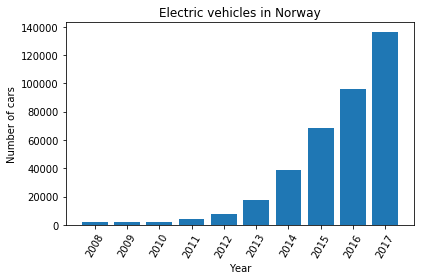

In [2]:
evs_ssb = np.array([1691,1762,2035,3849,7961,17670,38422,68516,96086,136255])
years = range(2008,2018)
plt.bar(years,evs_ssb)
plt.title("Electric vehicles in Norway")
plt.ylabel("Number of cars")
plt.xlabel("Year")
plt.xticks(years,rotation=60)
plt.tight_layout()
plt.savefig('C:/Users/bfesc/Documents/Master_thesis/figs/EV_stats/norwegian_evs.pdf')
plt.show()

In [5]:
grid_signals = pd.read_csv('C:/Users/bfesc/Documents/Master_thesis/master_data/dataport/dataport-ev-grid-signals.csv', header=0,
                          index_col=0)
ev_signals = pd.read_csv('C:/Users/bfesc/Documents/Master_thesis/master_data/dataport/dataport-ev-signals.csv', header=0,
                          index_col=0)

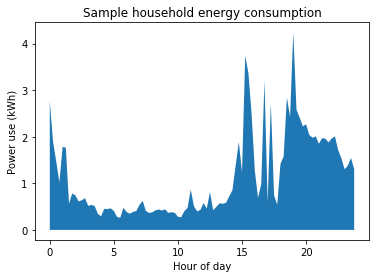

In [37]:

plt.fill_between(np.arange(24*4)/4,np.zeros(24*4),grid_signals.iloc[0][:24*4].values)
plt.title("Sample household energy consumption")
plt.xlabel("Hour of day")
plt.ylabel("Power use (kWh)")
plt.savefig('C:/Users/bfesc/Documents/Master_thesis/figs/EV_stats/sample_daily_consumption.pdf')
plt.show()

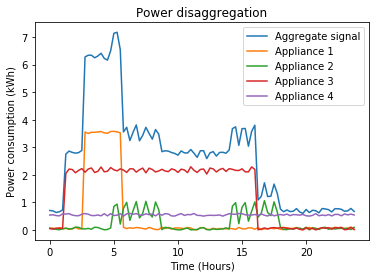

In [126]:
appliance_1 = np.random.random(24*4)*0.1
dice = np.random.randint(0,24*4 - 3*4)
appliance_1[dice:dice + 3*4] += 3.5

appliance_2 = np.random.random(24*4)*0.1
dice = np.random.randint(0,24*4 - 4*4)
appliance_2[dice:dice + 4*4] += abs(np.sin(np.arange(4*4)))

dice = np.random.randint(0,24*4 - 4*4)
appliance_2[dice:dice + 4*4] += abs(np.sin(np.arange(4*4)))

appliance_3 = np.random.random(24*4)*0.1
dice = np.random.randint(0,24*4 - 4*15)
appliance_3[dice:dice + 4*15] += 2 + abs(np.sin(np.arange(4*15))*0.2)

appliance_4 = np.random.random(24*4)*0.1 + 0.5
agg = appliance_1 + appliance_2 + appliance_3 + appliance_4 

plt.plot(np.arange(4*24)/4,agg, label="Aggregate signal")
plt.plot(np.arange(4*24)/4,appliance_1, label="Appliance 1")
plt.plot(np.arange(4*24)/4,appliance_2, label="Appliance 2")
plt.plot(np.arange(4*24)/4,appliance_3, label="Appliance 3")
plt.plot(np.arange(4*24)/4,appliance_4, label="Appliance 4")
plt.xlabel("Time (Hours)")
plt.ylabel("Power consumption (kWh)")
plt.title("Power disaggregation")
plt.legend()
plt.savefig('C:/Users/bfesc/Documents/Master_thesis/figs/Other/sample_disagg.pdf')
plt.show()

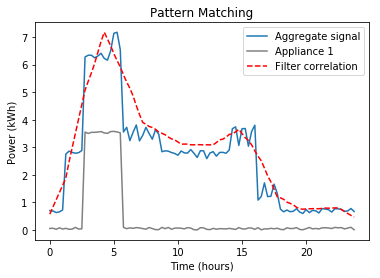

In [163]:
xcorr = scipy.signal.correlate(agg, appliance_1[10:24], mode='same')
xcorr /= np.max(xcorr)
xcorr *= np.max(agg)
plt.plot(np.arange(4*24)/4,agg, label="Aggregate signal")
plt.plot(np.arange(4*24)/4,appliance_1, color='gray', label="Appliance 1")
plt.plot(np.arange(4*24)/4,xcorr, ls='--', color='red', label="Filter correlation")
plt.title("Pattern Matching")
plt.legend()
plt.xlabel("Time (hours)")
plt.ylabel("Power (kWh)")
plt.savefig('C:/Users/bfesc/Documents/Master_thesis/figs/Other/sample_mf.pdf')
plt.show()